In [1]:
import numpy as np
import matplotlib.pyplot as plt

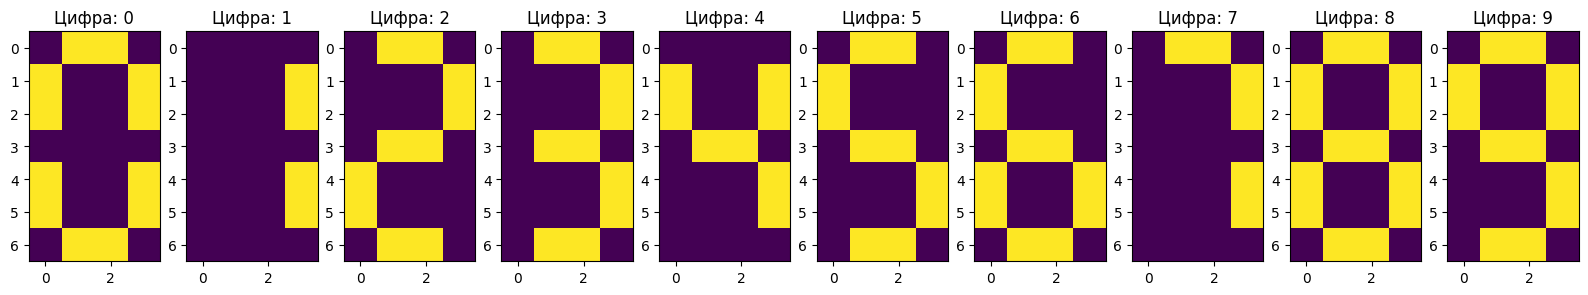

In [2]:
digit_0 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_1 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_2 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0]   
])

digit_3 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_4 = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_5 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_6 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_7 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_8 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_9 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digits = np.array([
    digit_0,
    digit_1,
    digit_2,
    digit_3,
    digit_4,
    digit_5,
    digit_6,
    digit_7,
    digit_8,
    digit_9
])

even = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1])

def plot_digits(predicted = None): 
    fig, axs = plt.subplots(1, 10, figsize=(20,5))
    for i in range(10):
        axs[i].imshow(digits[i])
        if predicted is not None:
            even = 'чет' if predicted[i] > 0 else 'нечет'
            axs[i].set_title(f'Цифра: {i}; {even}')
        else:
            axs[i].set_title(f'Цифра: {i}')
    plt.show()

plot_digits()

In [27]:
X = np.array([
    np.array([-1, -1]),
    np.array([-1, 1]),
    np.array([1, -1]),
    np.array([1, 1])
])

Y = np.array([-1, -1, -1, 1])

In [30]:
X = digits.reshape(10, 28)
Y = even

In [20]:
class NeuralNetwork:

    def __init__(self, weights, threshold) -> None:
        self.weights = weights
        self.threshold = threshold

    def predict(self, input_arr):
        result = input_arr.T @ self.weights - self.threshold
        return 1 if result > 0 else -1

    def hebb(self, X_value, Y_value): 
        self.weights = self.weights + X_value * Y_value
        self.threshold = self.threshold - Y_value

    def train(self, train_X, train_Y):
        accuracy_hist = []
        step = 0
        for idx, X_value in enumerate(train_X):
            print(f'\n--------- Step {step} ---------')
            print(f'Before | Weights: {self.weights}; T: {self.threshold}')
            Y_value = train_Y[idx]
            self.hebb(X_value, Y_value)
            accuracy_hist.append(self.accuracy(train_X, train_Y))
            print(f'After | Weights: {self.weights}; T: {self.threshold}')
            print(f'-------------------------------')
            step += 1
        return accuracy_hist

    def accuracy(self, train_X, train_Y):
        correct = 0
        for idx, X_value in enumerate(train_X):
            if self.predict(X_value) == train_Y[idx]:
                correct += 1
        return correct / len(train_X)


In [31]:
neural_net = NeuralNetwork(np.zeros((X.shape[1],)), 0)
neural_net.train(X, Y);


--------- Step 0 ---------
Before | Weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; T: 0
After | Weights: [0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0.]; T: -1
-------------------------------

--------- Step 1 ---------
Before | Weights: [0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0.]; T: -1
After | Weights: [0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0.]; T: 0
-------------------------------

--------- Step 2 ---------
Before | Weights: [0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0.]; T: 0
After | Weights: [0. 2. 2. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 2. 0. 0. 0. 2. 0. 0. 0.
 0. 2. 2. 0.]; T: -1
-------------------------------

--------- Step 3 ---------
Before | Weights: [0. 2. 2. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 2. 0. 0. 0. 2. 0. 0. 0.
 0. 2. 2. 0.]; T: -1
After | Weight

In [32]:
for val in X:
    print(f'{val}: {neural_net.predict(val)}')

[0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0]: 1
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]: -1
[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0]: 1
[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0]: 1
[0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]: 1
[0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0]: 1
[0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0]: 1
[0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]: -1
[0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0]: 1
[0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0]: 1


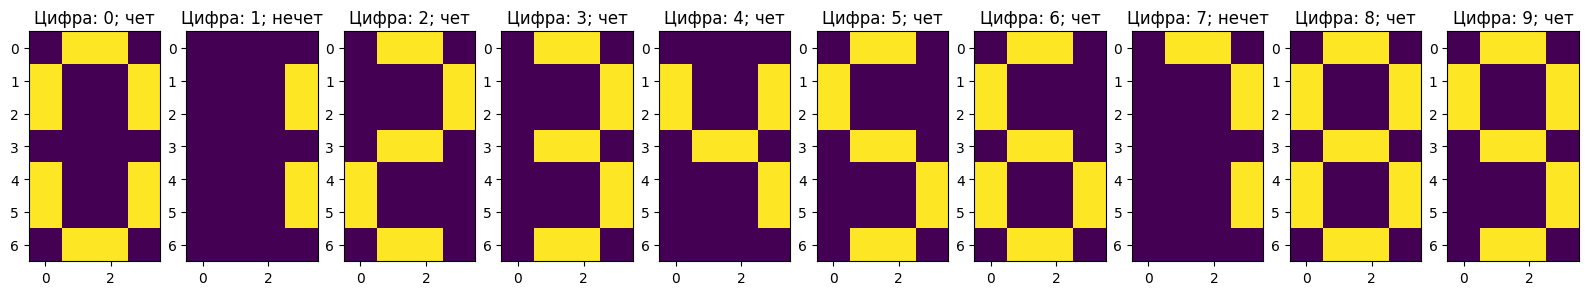

In [33]:
plot_digits([neural_net.predict(val) for val in X])